
# <center> <span style="color:darkgreen">TEAM ZOOM </center> </span>
### <center> <span style="color:darkorange">UNB Data Challenge: Analytics</center> </span>
#### 
#### 
#### 

#### <span style="color:darkgreen"> Dataset: CPSS 4: INFORMATION SOURCES CONSULTED DURING THE PANDEMIC (2020 July 20-26) </span>
#### 
####   
#### <div style="text-align: right"> <span style="color:darkgreen">   Jophy Joy + Tressy Thomas </div> </span>
#### <div style="text-align: right"> <span style="color:darkgreen"> 12 March 2021</div> </span>
#### 
#### 


## <center><span style="color:darkorange">   OBJECTIVE </center> </span>
# 
### <span style="color:darkorange"> Derive insights on:  </span>
# 
 
   ### <span style="color:darkgreen"> 1.  The impact of source of information on the precautions taken to reduce risk and what are the most trusted online information source among Canadians ? </span>
   # 
   ### <span style="color:darkgreen">2. The mental health of Canadians based on Socio-economic status during the pandemic  </span>
   # 
   ### <span style="color:darkgreen">3. What is the impact of education level on keeping Canadians employed during pandemic? </span>
    
#   
#  
#   
# 

## <center><span style="color:darkorange">   MOTIVATION </center> </span>


### <span style="color:darkgreen"> 1. Health care system in Canada is overloaded with Corona cases and using most effective sources of information in reducing the amplitude of further contagon is now important than ever. </span>
# 
### <span style="color:darkgreen"> 2. The mental strain caused by the pandemic is significant among canadians </span>
<span style="color:darkorange"> source:CAMH Policy Advice July 2020. </span>
### <span style="color:darkgreen"> Investigating on how the mental health and habits on SEC can contribute information on the area to focus to improve mental wellbeing of Canadians.</span>
# 
### <span style="color:darkgreen"> 3. As soon to be graduates, we were curious to know if there was any link between educational level and employment status during tough times!</span>
#  
#   
#   

In [1]:
#Load libraries and read dataset
options(pen=999)
library(survey)
library(dplyr)
library(ggplot2)
library(data.table)
#Read Survey data and get dimension and missing values
raw=read.csv("C:\\Users\\Tress\\OneDrive\\Desktop\\Learn\\Data Challenge\\Rawds.csv",header=TRUE,sep=',',na.strings=c("","N/A"," ","NA",'NULL'))
head(raw)
cat("The dimension of the dataset",dim(raw),"; and the number of Missing Values is ", sum(is.na(raw)))

Warning message:
"package 'survey' was built under R version 3.6.3"Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



CASEID,agegrp,anxdvgac,anxdvgad,anxdvsev,hhldsizc,immigrnc,marstatc,mhdvmhi,pchild,...,fc_20a,fc_20b,fc_20ce,fc_20d,fc_20f,fc_20g,fc_25,fc_30,fc_35,pempstc
6032,5,2,7,2,2,1,2,3,0,...,6,6,6,6,6,6,3,2,4,4
6033,2,1,16,4,2,1,1,1,1,...,6,6,6,6,6,6,3,2,5,2
6034,4,2,2,1,2,1,2,3,1,...,6,6,6,6,6,6,6,6,6,1
6035,2,2,6,2,1,1,4,2,0,...,6,6,6,6,6,6,3,2,3,4
6036,6,2,2,1,2,1,1,3,0,...,6,6,6,6,6,6,6,6,6,1
6037,7,1,12,3,2,1,1,1,0,...,2,2,2,1,2,2,1,2,5,4


The dimension of the dataset 4218 103 ; and the number of Missing Values is  0


## <center><span style="color:darkorange">   Dataset Overview: The survey data says... </center> </span>
 
### <span style="color:darkgreen"> Over 60 % consulted Online newspaper / news sites for Covid Info. </span>

### <span style="color:darkgreen"> Most canadians are serious about the credibility of online information. 71% did some validations. 51% did it often or always. ( ... and more than half did double check!.) </span>

### <span style="color:darkgreen"> Over 90% took precautions by washing hands, using physical distancing and avoiding crowds. </span>

### <span style="color:darkgreen"> More than their own health, Canadians are concerned about others health, and overburdening health system. </span>

### <span style="color:darkgreen">  Less than 10% are worried about violence at home. </span>

### <span style="color:darkgreen"> Spending time on internet and watching television are the most increased habits during the week. </span>
 
### <span style="color:darkgreen"> Close to 90% of canadians went to shopping atleast once during the week.</span>
#  

    

In [2]:
#Function to create data for analysis 
proportions <- function(check_val='Infosources'){
  #print(check_val)
  switch(check_val,
         Infosources = {
           analysis_data_infosource=raw %>%
             select(pers_wgt,fc_05a,	fc_05b,	fc_05c,	fc_05d,	fc_05e,	fc_05f,	fc_05g,	fc_05h,	fc_05i,	fc_05j,	fc_05k,	fc_05l) 
           col_names=c("pers_wgt",
                       "Social media posts from users/influencers",
                       "Social media posts from news orgs, magazines",
                       "Online newspapers or news sites",
                       "Online magazine on current events",
                       "Online forums",
                       "Online encyclopedia or repository",
                       "Blogs",
                       "Podcasts",
                       "Online video sharing platforms",
                       "Email from a friend or family",
                       "Other",
                       "Did not use Internet to find info on COVID-19")
           rel_fields=c(1)
           
         },
         Accuracy_check = {
           analysis_data_infosource=raw %>%
             select(pers_wgt,fc_15a,	fc_15b,	fc_15c,	fc_15d,	fc_15e,	fc_15f,	fc_15g,	fc_15h)
           col_names=c("pers_wgt",
                       "Searched author/source for credibility",
                       "Consulted other sources",
                       "Clicked on the link to read the entire news article",
                       "Verified URL for credibility",
                       "Verified the date of the information",
                       "Read comments to see discussion on the topic/source",
                       "Consulted friends, family, online network",
                       "Other"
           )
           rel_fields=c(1)
         },
         Precautions = {
           analysis_data_infosource=raw %>%
             select(pers_wgt,bh_20a,	bh_20b,	bh_20c,	bh_20d,	bh_20e,	bh_20f,	bh_20g,	bh_20h,	bh_20i,	bh_20j,	bh_20k,	bh_20l,	bh_20m,	bh_20n,	bh_20o)
           col_names=c("pers_wgt",
                       "Stocked up on essentials",
                       "Filled prescriptions",
                       "Made a plan for sick hhld members",
                       "Made a plan other non-hhld memb",
                       "Made a plan communicate",
                       "Avoided leaving the house",
                       "Used physical distancing in public",
                       "Avoided crowds and large gathering",
                       "Washed your hands more regularly",
                       "Avoided touching your face",
                       "Cancelled travel",
                       "Worked from home",
                       "Wore mask/other p.p.e",
                       "Other",
                       "None"
                       
           )
           rel_fields=c(1)
         },
         Concern = {
           analysis_data_infosource=raw %>%
             select(pers_wgt,bh_55a,	bh_55b,	bh_55c,	bh_55d,	bh_55e,	bh_55f,	bh_55g,	bh_55h,	bh_55i,	bh_55j,	bh_55k,	bh_55l)
           col_names=c("pers_wgt",
                       "My own health",
                       "Member of household’s health",
                       "Vulnerable people’s health",
                       "Canadian population’s health",
                       "World population’s health",
                       "Overloading the health system",
                       "Civil disorder",
                       "Maintaining social ties",
                       "Ability to support in crisis",
                       "Ability to support post-crisis",
                       "Family stress from confinement",
                       "Violence in the home")
           rel_fields=c(2,3,4)
         },
         Activities= {
           analysis_data_infosource=raw %>%
             select(pers_wgt,bh_35a,	bh_35b,	bh_35c,	bh_35d,	bh_35e)
           col_names=c("pers_wgt",
                       "Communication with friends and family",
                       "Meditation",
                       "Exercise outdoors",
                       "Exercise indoors",
                       "Changing my food choices")
           rel_fields=c(1,2,3)
         },
         Habits = {
           analysis_data_infosource=raw %>%
             select(pers_wgt,bh_40a,bh_40b,bh_40c,	bh_40d,	bh_40e,	bh_40f,	bh_40g,	bh_40h)
           col_names=c("pers_wgt",
                       "Consuming alcohol",
                       "Using tobacco products",
                       "Consuming cannabis",
                       "Eating junk food or sweets",
                       "Watching television",
                       "Spending time on the internet",
                       "Playing video games",
                       "Playing board games")
           rel_fields=c(1)
         },
         Lastweek= {
           analysis_data_infosource=raw %>%
             select(pers_wgt,bh_60a,bh_60b,	bh_60c)
           col_names=c("pers_wgt",
                       "Went shopping at the grocery store or drugstore",
                       "Used delivery service for groceries or drugstore",
                       "Used a food delivery service for prepared food"
           )
           rel_fields=c(1,2,3)
         }
         
  )
  colnames(analysis_data_infosource)=col_names
  tot_pers_wgt=sum(analysis_data_infosource$pers_wgt)
  prop=apply(analysis_data_infosource,2,function(x) round(100*sum(analysis_data_infosource$pers_wgt[x%in%rel_fields])/tot_pers_wgt,1))
  #n1=apply(analysis_data_infosource,2,function(x) nrow(analysis_data_infosource[x==1,]))
  #nall=nrow(analysis_data_infosource)
  proportion=t(t(prop))
  tmp=data.frame(proportion,Indicator=rownames(proportion),row.names=NULL)[-1,] 
  tmp$Indicator=factor(tmp$Indicator,levels=tmp$Indicator)
  tmp=tmp%>% arrange(desc(proportion))
  #print(tmp)
  return(tmp)

  
}

In [3]:
#COVID info sources
proportions('Infosources') 

proportion,Indicator
61.0,Online newspapers or news sites
34.4,"Social media posts from news orgs, magazines"
29.4,Social media posts from users/influencers
9.8,Did not use Internet to find info on COVID-19
8.5,Online magazine on current events
8.5,Online video sharing platforms
6.1,Other
5.0,Online forums
4.9,Email from a friend or family
3.7,Online encyclopedia or repository


In [4]:
proportions('Accuracy_check')

proportion,Indicator
56.5,Consulted other sources
43.4,Clicked on the link to read the entire news article
23.6,Verified the date of the information
22.1,Searched author/source for credibility
21.4,Read comments to see discussion on the topic/source
18.0,"Consulted friends, family, online network"
16.1,Verified URL for credibility
4.8,Other


In [5]:
proportions('Precautions')

proportion,Indicator
92.6,Washed your hands more regularly
89.7,Used physical distancing in public
89.2,Avoided crowds and large gathering
84.3,None
74.0,Avoided leaving the house
66.0,Avoided touching your face
46.6,Stocked up on essentials
46.1,Cancelled travel
29.5,Made a plan communicate
27.4,Worked from home


In [6]:
proportions('Concern')

proportion,Indicator
91.1,Canadian population’s health
90.7,Vulnerable people’s health
90.7,Overloading the health system
89.6,World population’s health
83.4,Member of household’s health
80.8,My own health
75.4,Civil disorder
74.6,Ability to support in crisis
71.9,Maintaining social ties
69.4,Ability to support post-crisis


In [7]:
proportions('Activities')

proportion,Indicator
91.0,Communication with friends and family
74.1,Exercise outdoors
52.4,Exercise indoors
46.0,Changing my food choices
25.0,Meditation


In [8]:
proportions('Habits')

proportion,Indicator
56.1,Spending time on the internet
45.5,Watching television
26.2,Eating junk food or sweets
18.4,Playing video games
16.0,Consuming alcohol
15.8,Playing board games
5.9,Consuming cannabis
4.7,Using tobacco products


In [9]:
proportions('Lastweek')

proportion,Indicator
89.7,Went shopping at the grocery store or drugstore
26.4,Used a food delivery service for prepared food
12.7,Used delivery service for groceries or drugstore


## <center><span style="color:darkorange">   Impact of source of information on the precautions taken to reduce risk </center> </span>

Data wrangling Steps: 
1. Filter only required fields. 
2. Transform the fields to get indicator value for analysis.
3. Subset the data for analysis.

In [38]:
#Extract data for Analysis on the use of information source and precautions taken.
analysis_prec_info=select(raw,pumfid,
         pers_wgt,
         bh_05c, #main info source
         bh_20f, #Avoided leaving the house
         bh_20g, #Used physical distancing in public
         bh_20h, #Avoided crowds and large gathering
         bh_20i, #Washed your hands more regularly
         bh_20j, #Avoided touching your face
         bh_20k, #Cancelled travel
         bh_20l, #Worked from home
         bh_20o) #mask use 

In [39]:
#For plots 
y_axis_breaks=c("1","2","3","4","5","6","7","8","9","10","11","12")
y_axis_labels=c("News outlets","Federal health agency",
                "Provincial or territorial health agency",
                "Municipal health agency ",
                "Federal daily announcements",
                "Provincial daily announcements",
                "Social media",
                "Family, friends or colleagues",
                "Health professionals",
                "Place of employment",
                "Other",
                "I do not look for information about this")
#Function to create CI
estimate_table <-function(survey_mean) {
  p_mean=survey_mean
  p_estimates=data.frame(confint(p_mean)[c(1:12),])
  rownames(p_estimates)=y_axis_labels
  p_estimates$Mean=p_mean[,2]
  print(p_estimates[order(p_estimates$Mean,decreasing = TRUE),])
  
}


### 51% of Canadians consulted News outlets for COVID-19 info;

### Near to 10% consulted Prov. Health Agency. 10% relied on Prov daily announcements and Social media as their primary info source 

<details>   
    
    
    
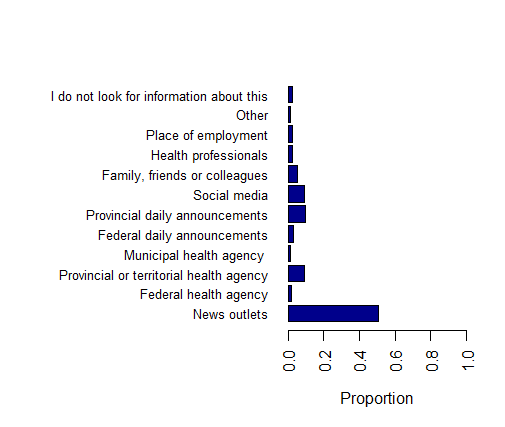 
    
    

    
</details>



#### Use of Main information source by Sex. 
<details>  
Blue indicates Males, pink indicates female proportion.
    
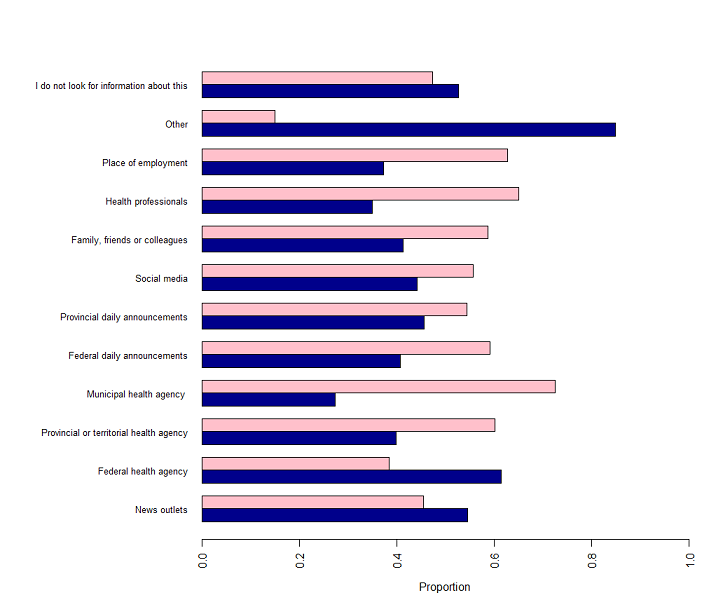
    
    </details>  

In [40]:
#Data transformation
table(analysis_prec_info$bh_05c)
analysis_prec_info$lh_ind=cut(analysis_prec_info$bh_20f,c(0,1,Inf), c(1,0))
analysis_prec_info$pd_ind=cut(analysis_prec_info$bh_20g,c(0,1,Inf), c(1,0))
analysis_prec_info$ac_ind=cut(analysis_prec_info$bh_20h,c(0,1,Inf), c(1,0))
analysis_prec_info$wh_ind=cut(analysis_prec_info$bh_20i,c(0,1,Inf), c(1,0))
analysis_prec_info$tf_ind=cut(analysis_prec_info$bh_20j,c(0,1,Inf), c(1,0))
analysis_prec_info$ct_ind=cut(analysis_prec_info$bh_20k,c(0,1,Inf), c(1,0))
analysis_prec_info$wfh_ind=cut(analysis_prec_info$bh_20l,c(0,1,Inf), c(1,0))
analysis_prec_info$wm_ind=cut(analysis_prec_info$bh_20o,c(0,1,Inf), c(1,0))
svy_data_all = svydesign(id=~pumfid, weights=~pers_wgt, survey.lonely.psu = "adjust", data=analysis_prec_info)
svy_data=subset(svy_data_all,bh_05c <13)
main_source=svymean(~factor(bh_05c),design =svy_data)
print(main_source)


   1    2    3    4    5    6    7    8    9   10   11   12   99 
2100   84  475   70  127  501  343  148   87  120   38  124    1 

                     mean     SE
factor(bh_05c)1  0.506187 0.0141
factor(bh_05c)2  0.018981 0.0031
factor(bh_05c)3  0.094978 0.0076
factor(bh_05c)4  0.016485 0.0040
factor(bh_05c)5  0.031693 0.0058
factor(bh_05c)6  0.097672 0.0077
factor(bh_05c)7  0.094911 0.0075
factor(bh_05c)8  0.050418 0.0081
factor(bh_05c)9  0.023476 0.0046
factor(bh_05c)10 0.025536 0.0043
factor(bh_05c)11 0.013283 0.0048
factor(bh_05c)12 0.026380 0.0040


In [15]:
#Avoided Leaving Home
#svytable(~lh_ind+bh_05c,design =svy_data)
leavehome_mean=svyby(~lh_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(leavehome_mean)

#Test to check if there is any variance in avoiding leaving home and primary info source
svyranktest(bh_20f~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Federal daily announcements              0.8044959 0.9479816 0.8762388
Municipal health agency                  0.7401133 0.9581593 0.8491363
Health professionals                     0.7133018 0.9301438 0.8217228
Federal health agency                    0.6616471 0.9333072 0.7974771
Family, friends or colleagues            0.6596055 0.9123850 0.7859952
Provincial daily announcements           0.7050882 0.8305492 0.7678187
Provincial or territorial health agency  0.6983636 0.8353688 0.7668662
News outlets                             0.7207195 0.7872162 0.7539679
Other                                    0.4926077 0.9731897 0.7328987
Place of employment                      0.4822677 0.8101301 0.6461989
Social media                             0.5643445 0.7164891 0.6404168
I do not look for information about this 0.1806596 0.4124591 0.2965594



	Design-based KruskalWallis test

data:  bh_20f ~ bh_05c
df = 11, Chisq = 86.438, p-value = 1.179e-13


In [16]:
#Physical distancing
phydist_mean=svyby(~pd_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(phydist_mean)

#Test to check if there is any variance in Physical distancing and primary info source
svyranktest(bh_20g~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Federal daily announcements              0.8976621 0.9943621 0.9460121
Provincial daily announcements           0.9184182 0.9731504 0.9457843
Provincial or territorial health agency  0.8975542 0.9771202 0.9373372
Municipal health agency                  0.8677989 0.9974909 0.9326449
Place of employment                      0.8564879 0.9898889 0.9231884
News outlets                             0.8883678 0.9293874 0.9088776
Health professionals                     0.8225320 0.9845317 0.9035319
Federal health agency                    0.7463623 1.0099863 0.8781743
Family, friends or colleagues            0.7321713 0.9642737 0.8482225
Social media                             0.7626060 0.8838895 0.8232478
Other                                    0.6248545 1.0138909 0.8193727
I do not look for information about this 0.5045689 0.7666769 0.6356229



	Design-based KruskalWallis test

data:  bh_20g ~ bh_05c
df = 11, Chisq = 37.152, p-value = 0.000114


In [17]:
#Avoided Crowds and gathering
avdcrwd_mean=svyby(~ac_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(avdcrwd_mean)

#Test to check if there is any variance in avoiding Crowds and gathering and primary info source
svyranktest(bh_20h~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Municipal health agency                  0.9611414 1.0081291 0.9846353
Federal health agency                    0.8845324 0.9864864 0.9355094
Federal daily announcements              0.8667883 0.9848119 0.9258001
News outlets                             0.9000755 0.9349557 0.9175156
Provincial or territorial health agency  0.8737487 0.9601349 0.9169418
Health professionals                     0.8045439 0.9764329 0.8904884
Family, friends or colleagues            0.7557795 0.9788822 0.8673308
Provincial daily announcements           0.7912019 0.9407215 0.8659617
Social media                             0.7851876 0.9219420 0.8535648
Place of employment                      0.7488778 0.9423836 0.8456307
Other                                    0.5187825 0.9851351 0.7519588
I do not look for information about this 0.4574846 0.7336593 0.5955719



	Design-based KruskalWallis test

data:  bh_20h ~ bh_05c
df = 11, Chisq = 60.384, p-value = 9.198e-09


In [18]:
#Washing Hands
washands_mean=svyby(~wh_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(washands_mean)

#Test to check if there is any variance in washing hands and primary info source
svyranktest(bh_20i~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Place of employment                      0.9399296 1.0042188 0.9720742
Provincial daily announcements           0.9390161 0.9813219 0.9601690
Federal health agency                    0.9069065 0.9954523 0.9511794
Health professionals                     0.8911947 1.0084102 0.9498025
News outlets                             0.9255333 0.9588934 0.9422134
Family, friends or colleagues            0.8864215 0.9940217 0.9402216
Provincial or territorial health agency  0.8940909 0.9780189 0.9360549
Municipal health agency                  0.7851194 1.0177309 0.9014251
Federal daily announcements              0.7956367 0.9924547 0.8940457
Social media                             0.8016719 0.9262306 0.8639513
Other                                    0.6061073 1.0070942 0.8066007
I do not look for information about this 0.5514669 0.7968379 0.6741524



	Design-based KruskalWallis test

data:  bh_20i ~ bh_05c
df = 11, Chisq = 33.744, p-value = 0.0004133


In [19]:
#Avoided touching your face
touchface_mean=svyby(~wh_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(touchface_mean)

#Test to check if there is any variance in Avoided touching your face and primary info source
svyranktest(bh_20j~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Place of employment                      0.9399296 1.0042188 0.9720742
Provincial daily announcements           0.9390161 0.9813219 0.9601690
Federal health agency                    0.9069065 0.9954523 0.9511794
Health professionals                     0.8911947 1.0084102 0.9498025
News outlets                             0.9255333 0.9588934 0.9422134
Family, friends or colleagues            0.8864215 0.9940217 0.9402216
Provincial or territorial health agency  0.8940909 0.9780189 0.9360549
Municipal health agency                  0.7851194 1.0177309 0.9014251
Federal daily announcements              0.7956367 0.9924547 0.8940457
Social media                             0.8016719 0.9262306 0.8639513
Other                                    0.6061073 1.0070942 0.8066007
I do not look for information about this 0.5514669 0.7968379 0.6741524



	Design-based KruskalWallis test

data:  bh_20j ~ bh_05c
df = 11, Chisq = 36.88, p-value = 0.0001265


In [20]:
#Cancelled travel
cantrvl_mean=svyby(~ct_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(cantrvl_mean)

#Test to check if there is any variance Cancelled travel and primary info source
svyranktest(bh_20k~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Municipal health agency                  0.4609199 0.8471678 0.6540438
Federal health agency                    0.4054633 0.7301896 0.5678264
Provincial or territorial health agency  0.4835348 0.6450637 0.5642992
Federal daily announcements              0.3466039 0.7037525 0.5251782
Other                                    0.1098221 0.8406508 0.4752364
Provincial daily announcements           0.3940884 0.5511795 0.4726339
Social media                             0.3672924 0.5252776 0.4462850
News outlets                             0.4065928 0.4823346 0.4444637
Family, friends or colleagues            0.2782228 0.6087033 0.4434631
Health professionals                     0.2460431 0.6226116 0.4343273
Place of employment                      0.2692260 0.5866843 0.4279551
I do not look for information about this 0.1006494 0.3195540 0.2101017



	Design-based KruskalWallis test

data:  bh_20k ~ bh_05c
df = 11, Chisq = 33.554, p-value = 0.0004436


In [21]:
#Worked from home
wfh_mean=svyby(~wfh_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(wfh_mean)

#Test to check if there is any variance in Worked from home and primary info source
svyranktest(bh_20l~bh_05c, design = svy_data, test=("KruskalWallis")) # Not Statistically Significant

                                             X2.5..   X97.5..      Mean
Municipal health agency                  0.16247558 0.5862549 0.3743652
Provincial or territorial health agency  0.28503521 0.4371159 0.3610755
Federal health agency                    0.18168299 0.5114283 0.3465556
Health professionals                     0.11449122 0.4741028 0.2942970
Other                                    0.01786847 0.5606173 0.2892429
News outlets                             0.24667256 0.3100531 0.2783628
Provincial daily announcements           0.20341091 0.3531877 0.2782993
Place of employment                      0.13406856 0.4111657 0.2726171
Social media                             0.16638931 0.2911255 0.2287574
Family, friends or colleagues            0.09769033 0.3285094 0.2130999
Federal daily announcements              0.06977762 0.2362128 0.1529952
I do not look for information about this 0.04589456 0.2467529 0.1463238



	Design-based KruskalWallis test

data:  bh_20l ~ bh_05c
df = 11, Chisq = 23.417, p-value = 0.01563


In [22]:
#Mask use
mask_mean=svyby(~wm_ind,~bh_05c,design =svy_data, na = TRUE, svymean)
estimate_table(mask_mean)
#People who use federal sources as main information source are more likely to wear a mask

#Test to check if there is any variance in Mask use and primary info source
svyranktest(bh_20o~bh_05c, design = svy_data, test=("KruskalWallis")) # Statistically Significant

                                            X2.5..   X97.5..      Mean
Federal daily announcements              0.8818007 0.9852774 0.9335391
Place of employment                      0.8416267 0.9784937 0.9100602
Provincial or territorial health agency  0.8195218 0.9130441 0.8662829
News outlets                             0.8424812 0.8870070 0.8647441
Federal health agency                    0.7677844 0.9588683 0.8633264
Municipal health agency                  0.7066909 0.9957150 0.8512030
Provincial daily announcements           0.7590596 0.9145958 0.8368277
Health professionals                     0.7250107 0.9404953 0.8327530
Family, friends or colleagues            0.6860118 0.9229672 0.8044895
Social media                             0.7187475 0.8523918 0.7855697
Other                                    0.5117352 0.9788219 0.7452785
I do not look for information about this 0.3446626 0.6416019 0.4931322



	Design-based KruskalWallis test

data:  bh_20o ~ bh_05c
df = 11, Chisq = 40.636, p-value = 2.956e-05


In [41]:
#Chi Square test for association
svychisq(~bh_05c+lh_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+pd_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+ac_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+wh_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+tf_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+ct_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+wfh_ind,design =svy_data,statistic="adjWald")
svychisq(~bh_05c+wm_ind,design =svy_data,statistic="adjWald")


	Design-based Wald test of association

data:  svychisq(~bh_05c + lh_ind, design = svy_data, statistic = "adjWald")
F = 3.479, ndf = 11, ddf = 4206, p-value = 7.42e-05



	Design-based Wald test of association

data:  svychisq(~bh_05c + pd_ind, design = svy_data, statistic = "adjWald")
F = 3.3276, ndf = 11, ddf = 4206, p-value = 0.0001406



	Design-based Wald test of association

data:  svychisq(~bh_05c + ac_ind, design = svy_data, statistic = "adjWald")
F = 3.3424, ndf = 11, ddf = 4206, p-value = 0.0001321



	Design-based Wald test of association

data:  svychisq(~bh_05c + wh_ind, design = svy_data, statistic = "adjWald")
F = 3.0853, ndf = 11, ddf = 4206, p-value = 0.0003844



	Design-based Wald test of association

data:  svychisq(~bh_05c + tf_ind, design = svy_data, statistic = "adjWald")
F = 2.4188, ndf = 11, ddf = 4206, p-value = 0.005369



	Design-based Wald test of association

data:  svychisq(~bh_05c + ct_ind, design = svy_data, statistic = "adjWald")
F = 2.1438, ndf = 11, ddf = 4206, p-value = 0.01481



	Design-based Wald test of association

data:  svychisq(~bh_05c + wfh_ind, design = svy_data, statistic = "adjWald")
F = 1.7663, ndf = 11, ddf = 4206, p-value = 0.0542



	Design-based Wald test of association

data:  svychisq(~bh_05c + wm_ind, design = svy_data, statistic = "adjWald")
F = 2.3331, ndf = 11, ddf = 4206, p-value = 0.007405


## 
### <span style="color:darkorange"> Analysis reveals that with respect to main source of information, there is a </span>
    
#### <span style="color:darkgreen"> -  significant variation in the precautions taken to reduce risk. </span> 
#### <span style="color:darkgreen"> -  significant association between precautions other than travel cancellations and wfh </span>

### -  <span style="color:darkorange">  People who consulted Federal daily announcements are more likely to  Avoid Leaving Home, practice Physical distancing and Use mask </span> 

### -  <span style="color:darkorange">  Municipal health agency has more influence in Avoiding Crowds and gathering </span> 

### -  <span style="color:darkorange">  Information at the Place of employment seem effective in Washing Hands, Avoided touching the face etc </span> 

### -   <span style="color:darkorange">  People who consulted Social media as their primary source of COVID-19 info do not appear to take most precautions.</span>  

### -  <span style="color:darkorange">  Evident that those who did not consult any information sources rarely take precautions. </span>  
###  
### 
### 
###  <center>  <span style="color:darkgreen"> Trustworthy sources </span>  </center>
    
###   <span style="color:darkgreen"> Canadians consider online forums as trustworthy source of information for COVID-19. </span> 
    

In [23]:
#Trusted sources
Trustedsource=raw %>%
    select(pumfid,pers_wgt,fc_05a,	fc_05b,	fc_05c,	fc_05d,	fc_05e,	fc_05f,	fc_05g,	fc_05h,	fc_05i,	fc_05j,	fc_05k,	fc_05l,fc_20g,fc_10) 
  
Trustedsource$trust_ind=cut(Trustedsource$fc_20g,c(0,1,Inf), c(1,0))
Trustedsource$nock_ind=cut(Trustedsource$fc_10,c(0,3,5,Inf), c(0,1,0))
  
svy_data_all = svydesign(id=~pumfid, weights=~pers_wgt, survey.lonely.psu = "adjust", data=Trustedsource)
svy_data=subset(svy_data_all,nock_ind==1&fc_05a==1)
r1=svytable(~factor(fc_05a)+trust_ind,design =svy_data)
 

svy_data=subset(svy_data_all,nock_ind==1&fc_05b==1)
r2=svytable(~factor(fc_05b)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05c==1)
r3=svytable(~factor(fc_05c)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05d==1)
r4=svytable(~factor(fc_05d)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05e==1)
r5=svytable(~factor(fc_05e)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05f==1)
r6=svytable(~factor(fc_05f)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05g==1)
r7=svytable(~factor(fc_05g)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05h==1)
r8=svytable(~factor(fc_05h)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05i==1)
r9=svytable(~factor(fc_05i)+trust_ind,design =svy_data)


svy_data=subset(svy_data_all,nock_ind==1&fc_05j==1)
r10=svytable(~factor(fc_05j)+trust_ind,design =svy_data)

svy_data=subset(svy_data_all,nock_ind==1&fc_05k==1)
r11=svytable(~factor(fc_05k)+trust_ind,design =svy_data)

ts_cmpr=data.frame("Source"=c("Social media posts from users/influencers",
              "Social media posts from news orgs, magazines",
              "Online newspapers or news sites",
              "Online magazine on current events",
              "Online forums",
              "Online encyclopedia or repository",
              "Blogs",
              "Podcasts",
              "Online video sharing platforms",
              "Email from a friend or family",
              "Other"),
"Trusted%"=c(117321.9,284838.6,624103.5,23680.7,57498.15,4593.575,569.1014,1603.779,21925.03,70500.74,126010),
"NotTrusted%"=c(1323590.3,1473305.6,2528062.8,238619.2,116833.85,132301.742,56936.3542,153755.463,406911.99,204324.33,262029.7))

ts_cmpr$trust_pc=ts_cmpr$trust_pc=ts_cmpr$Trusted./(ts_cmpr$Trusted.+ts_cmpr$NotTrusted.)
ts_cmpr=ts_cmpr[order(ts_cmpr$trust_pc,decreasing = TRUE),]
ts_cmpr$Source=factor(ts_cmpr$Source, levels =ts_cmpr$Source)
ts_cmpr

,Source,Trusted.,NotTrusted.,trust_pc
5,Online forums,57498.1500,116833.85,0.329819827
11,Other,126010.0000,262029.70,0.324734815
10,Email from a friend or family,70500.7400,204324.33,0.256529508
3,Online newspapers or news sites,624103.5000,2528062.80,0.197991933
2,"Social media posts from news orgs, magazines",284838.6000,1473305.60,0.162010943
4,Online magazine on current events,23680.7000,238619.20,0.090281010
1,Social media posts from users/influencers,117321.9000,1323590.30,0.081421963
9,Online video sharing platforms,21925.0300,406911.99,0.051126719
6,Online encyclopedia or repository,4593.5750,132301.74,0.033555385
8,Podcasts,1603.7790,153755.46,0.010323036


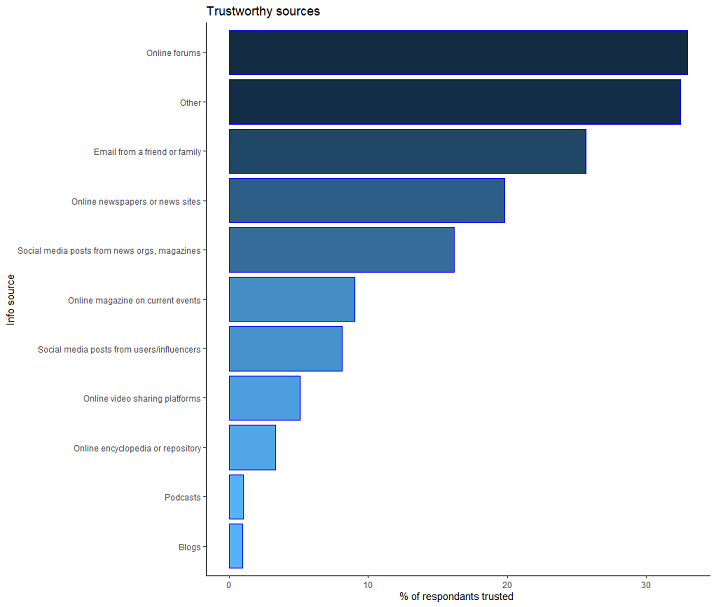 

## <center><span style="color:darkorange"> Mental health based on Socio economic status during the pandemic</center> </span>
The mental health of the canadian population from the survey: 
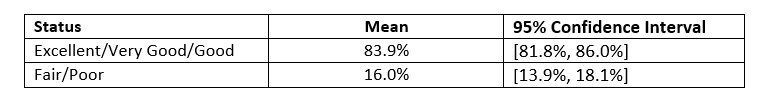 


In [42]:
analysis_mentalhealth_data=raw %>%
  select(pumfid,
         pers_wgt,
         agegrp,
         sex,
         rururb,
         immigrnc,
         marstatc,
         hhldsizc,
         peduc_lc,
         pempstc,
         mh_30)

In [43]:
#summary(analysis_mentalhealth_data)
table(analysis_mentalhealth_data$mh_30)
#Create mental health indicator . Good, Very good, Excellent --> 1
analysis_mentalhealth_data$mh_ind=cut(analysis_mentalhealth_data$mh_30,c(0,3,5,Inf), c(1,0,9))
svy_data_all = svydesign(id=~pumfid, weights=~pers_wgt, survey.lonely.psu = "adjust", data=analysis_mentalhealth_data)
svy_data = subset(svy_data_all ,mh_ind%in%c(1,0))
#summary(svy_data)
# Univariate Analysis
mental_health=svymean(~mh_ind,design =svy_data_all)
#barplot(mental_health,beside=TRUE,legend.text = F, 
#        xlab="Mental Health", col=c("orange","darkred","white"),ylim=c(0,1),
#        names.arg=c("Excellent~Good",'Fair/Poor','Other'))
confint(mental_health)


   1    2    3    4    5    9 
1048 1463 1170  450   82    5 

,2.5 %,97.5 %
mh_ind1,0.8177117146,0.859706075
mh_ind0,0.1391443486,0.181084829
mh_ind9,-0.0001721429,0.002525175


      mh_ind
agegrp          1          0          9
     1 3286912.58 1058477.26       0.00
     2 3881139.32 1419101.84       0.00
     3 4224246.03  813072.97       0.00
     4 3912542.12  767411.21       0.00
     5 4611518.72  549454.54       0.00
     6 4283027.37  304828.35       0.00
     7 1923534.25   74676.96       0.00


	Design-based Wald test of association

data:  svychisq(~agegrp + mh_ind, design = svy_data, statistic = "adjWald")
F = 10.351, ndf = 6, ddf = 4207, p-value = 2.047e-11



Call:
svyglm(formula = factor(mh_ind) ~ factor(agegrp), design = svy_data, 
    family = quasibinomial)

Survey design:
subset(svy_data_all, mh_ind %in% c(1, 0))

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.1331     0.2598  -4.362 1.32e-05 ***
factor(agegrp)2   0.1270     0.3054   0.416 0.677483    
factor(agegrp)3  -0.5147     0.3043  -1.691 0.090895 .  
factor(agegrp)4  -0.4958     0.3183  -1.558 0.119403    
factor(agegrp)5  -0.9943     0.3057  -3.253 0.001153 ** 
factor(agegrp)6  -1.5095     0.3346  -4.511 6.62e-06 ***
factor(agegrp)7  -2.1156     0.5909  -3.580 0.000347 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 1.000237)

Number of Fisher Scoring iterations: 5



	Design-based KruskalWallis test

data:  factor(mh_ind) ~ factor(agegrp)
df = 6, Chisq = 68.664, p-value = 9.828e-13


   mh_ind
sex        1        0        9
  1 13285262  2063733        0
  2 12837658  2923290        0


	Design-based Wald test of association

data:  svychisq(~sex + mh_ind, design = svy_data, statistic = "adjWald")
F = 5.7015, ndf = 1, ddf = 4212, p-value = 0.01699


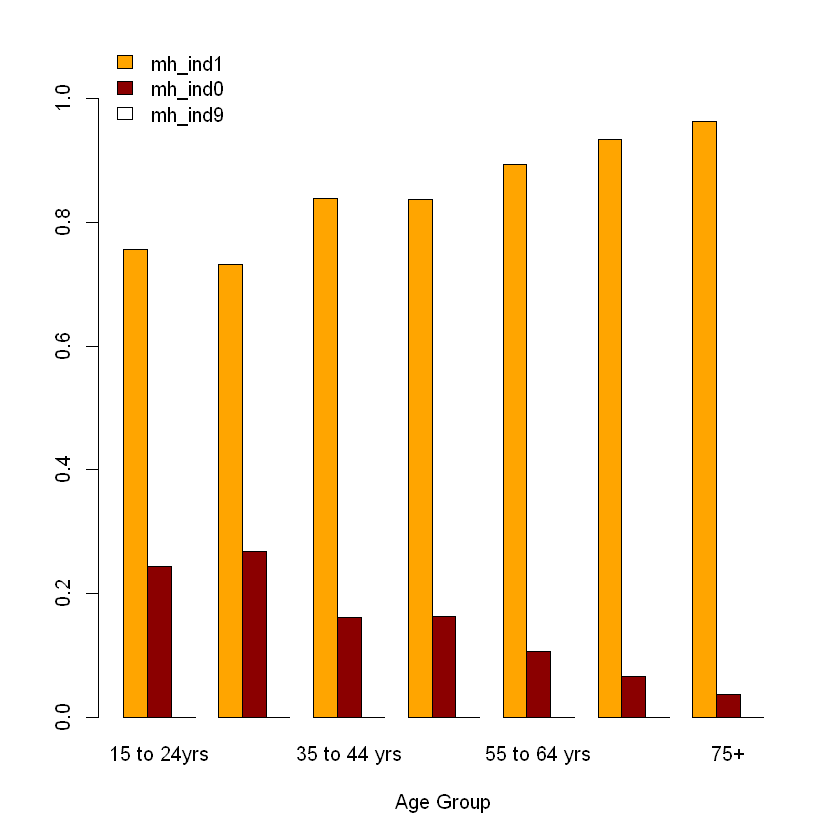

      mh_ind
rururb          1          0          9
     1  4194266.7   681098.3        0.0
     2 21928653.7  4305924.9        0.0


	Design-based Wald test of association

data:  svychisq(~rururb + mh_ind, design = svy_data, statistic = "adjWald")
F = 0.73477, ndf = 1, ddf = 4212, p-value = 0.3914


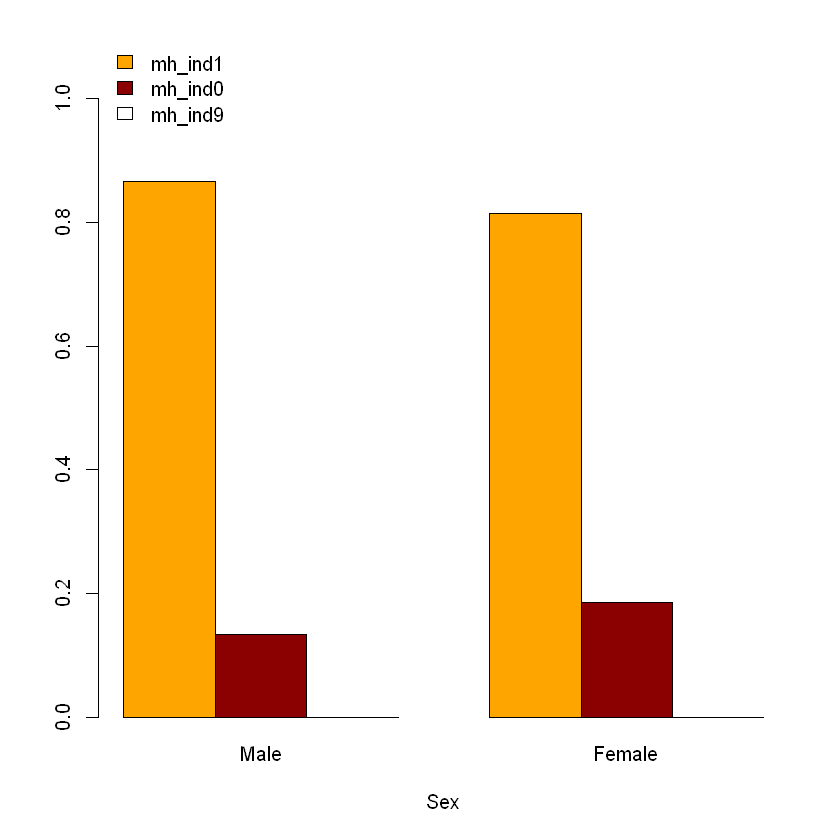

                     mean     SE
factor(immigrnc)1 0.75711 0.0129
factor(immigrnc)2 0.24289 0.0129

        mh_ind
immigrnc          1          0          9
       1 19358005.3  4195622.3        0.0
       2  6764915.1   791400.8        0.0


	Design-based Wald test of association

data:  svychisq(~immigrnc + mh_ind, design = svy_data, statistic = "adjWald")
F = 10.463, ndf = 1, ddf = 4212, p-value = 0.001227


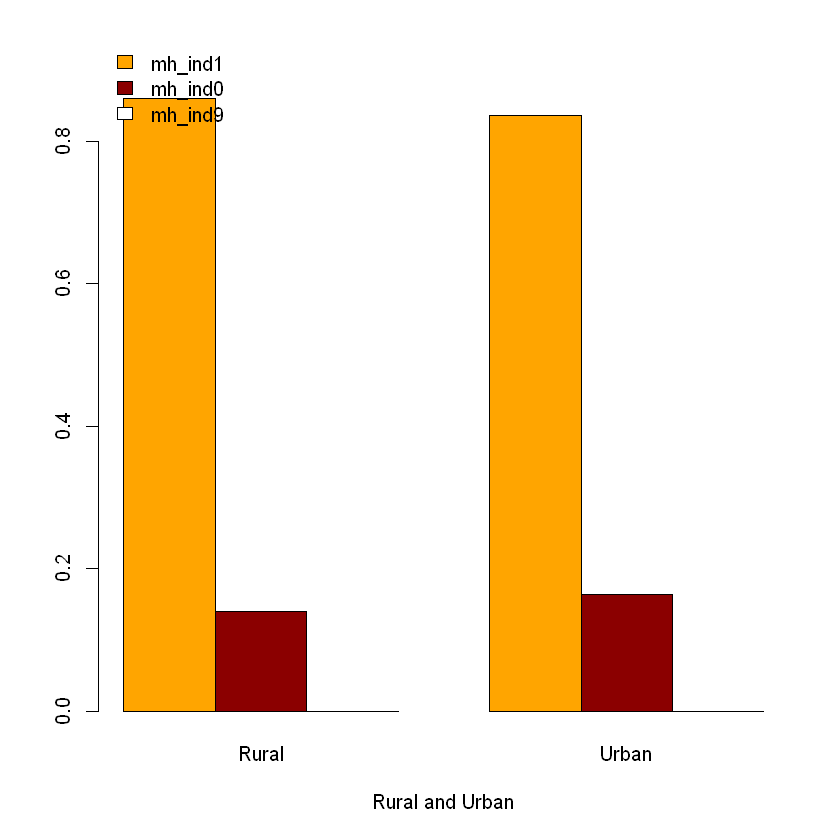


	Design-based KruskalWallis test

data:  factor(mh_ind) ~ factor(immigrnc)
t = -3.2892, df = 4211, p-value = 0.001013
alternative hypothesis: true difference in mean rank score is not equal to 0
sample estimates:
difference in mean rank score 
                  -0.03675996 


        mh_ind
hhldsizc          1          0          9
       1  3898318.8   963819.6        0.0
       2 14144169.5  2253466.3        0.0
       3  4571753.0   769634.1        0.0
       4  2462958.0   673139.9        0.0
       5  1045721.2   326963.3        0.0


	Design-based Wald test of association

data:  svychisq(~hhldsizc + mh_ind, design = svy_data, statistic = "adjWald")
F = 2.2346, ndf = 4, ddf = 4209, p-value = 0.06285


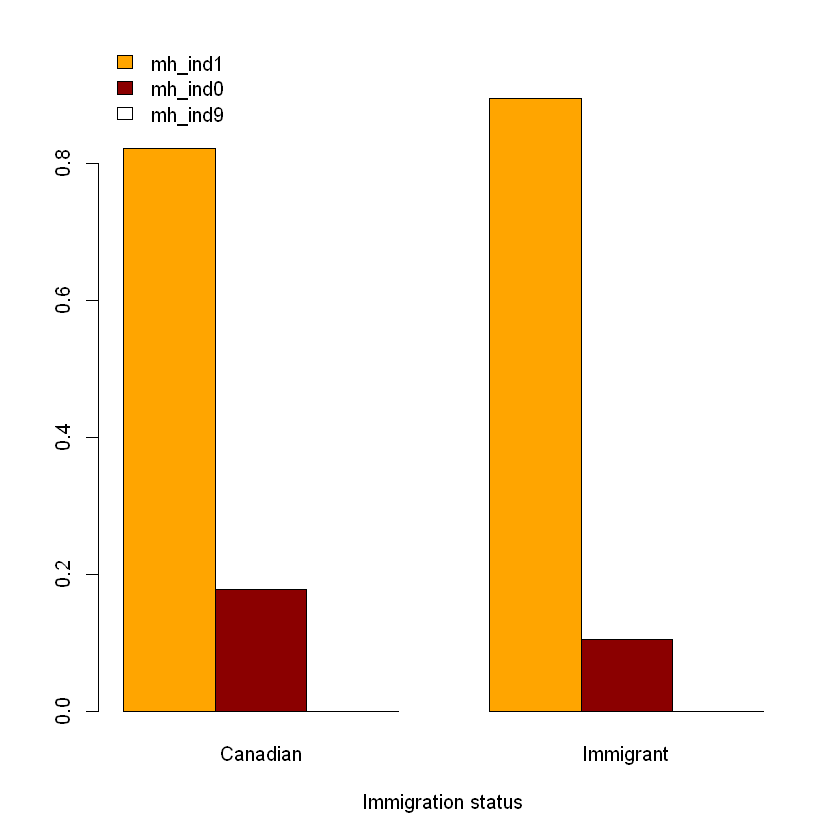

        mh_ind
marstatc          1          0          9
       1 13672107.7  1812149.9        0.0
       2  3024277.6   431107.0        0.0
       3  2896378.3   643978.5        0.0
       4  6530156.9  2099787.7        0.0


	Design-based Wald test of association

data:  svychisq(~marstatc + mh_ind, design = svy_data, statistic = "adjWald")
F = 6.4596, ndf = 3, ddf = 4210, p-value = 0.0002329


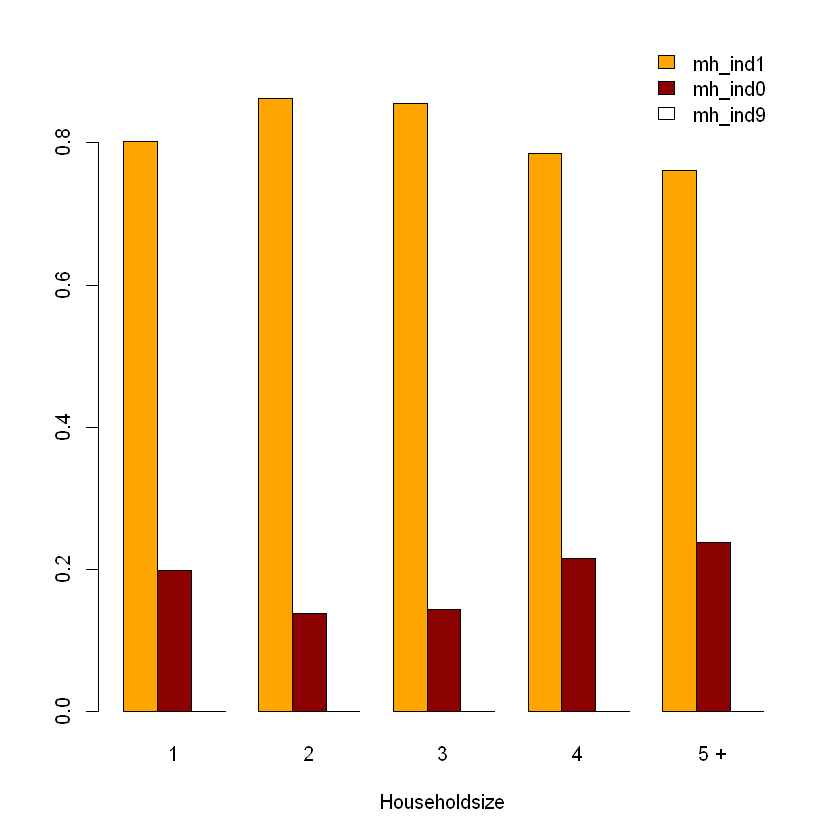


Call:
svyglm(formula = factor(mh_ind) ~ factor(marstatc), design = svy_data, 
    family = quasibinomial)

Survey design:
subset(svy_data_all, mh_ind %in% c(1, 0))

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.02084    0.10860 -18.609  < 2e-16 ***
factor(marstatc)2  0.07277    0.23802   0.306   0.7598    
factor(marstatc)3  0.51729    0.25046   2.065   0.0389 *  
factor(marstatc)4  0.88625    0.18740   4.729 2.33e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 1.000237)

Number of Fisher Scoring iterations: 4


                      mean     SE
factor(peduc_lc)1 0.120457 0.0130
factor(peduc_lc)2 0.270002 0.0136
factor(peduc_lc)3 0.095084 0.0081
factor(peduc_lc)4 0.203229 0.0098
factor(peduc_lc)5 0.024355 0.0033
factor(peduc_lc)6 0.194819 0.0092
factor(peduc_lc)7 0.092054 0.0058

        mh_ind
peduc_lc          1          0          9
       1 2926929.10  820466.67       0.00
       2 7009870.54 1389864.91       0.00
       3 2531743.56  426301.85       0.00
       4 5170111.61 1152346.49       0.00
       5  693681.39   64003.55       0.00
       6 5347347.58  713466.91       0.00
       7 2443236.63  420572.74       0.00


	Design-based Wald test of association

data:  svychisq(~peduc_lc + mh_ind, design = svy_data, statistic = "adjWald")
F = 2.0692, ndf = 6, ddf = 4207, p-value = 0.05357


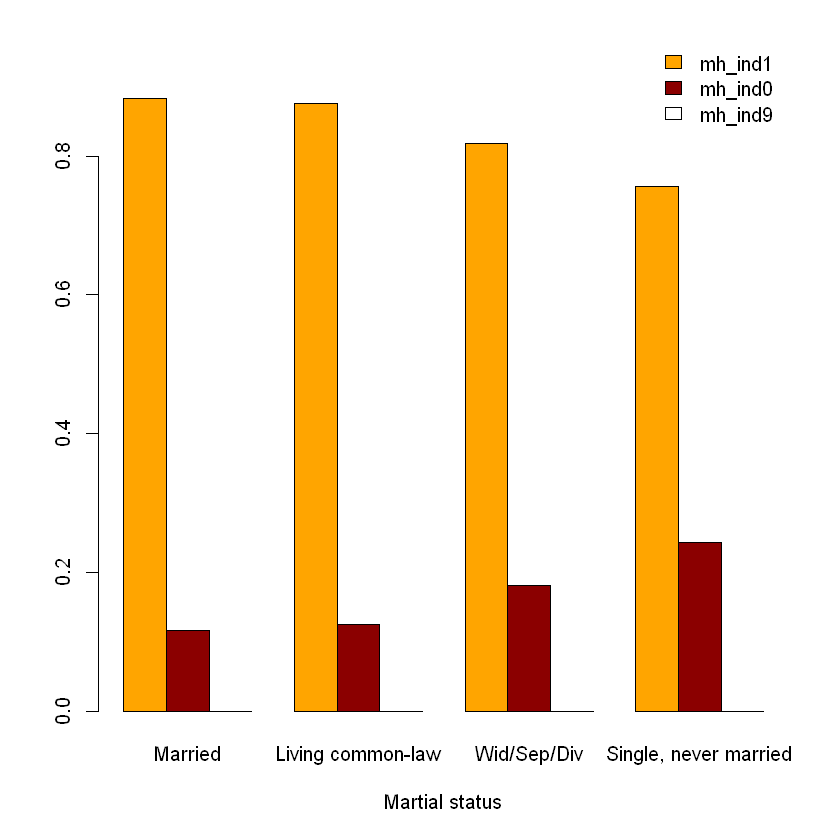

                     mean     SE
factor(pempstc)1 0.502637 0.0141
factor(pempstc)2 0.054996 0.0064
factor(pempstc)3 0.026433 0.0053
factor(pempstc)4 0.385523 0.0138
factor(pempstc)9 0.030411 0.0060

       mh_ind
pempstc          1          0          9
      1 13162098.5  2474916.0        0.0
      2  1430911.8   280021.0        0.0
      3   662806.1   159512.6        0.0
      4 10160816.9  1832772.3        0.0
      9   706287.2   239801.2        0.0


	Design-based Wald test of association

data:  svychisq(~pempstc + mh_ind, design = svy_data, statistic = "adjWald")
F = 0.29976, ndf = 4, ddf = 4209, p-value = 0.8782


,2.5 %,97.5 %
1:mh_ind1,0.81431320,0.8691410
2:mh_ind1,0.76720229,0.9054663
3:mh_ind1,0.63856906,0.9734729
4:mh_ind1,0.81222616,0.8821485
9:mh_ind1,0.55969302,0.9333750
1:mh_ind0,0.13085904,0.1856868
2:mh_ind0,0.09453372,0.2327977
3:mh_ind0,0.02652713,0.3614309
4:mh_ind0,0.11785149,0.1877738
9:mh_ind0,0.06662498,0.4403070


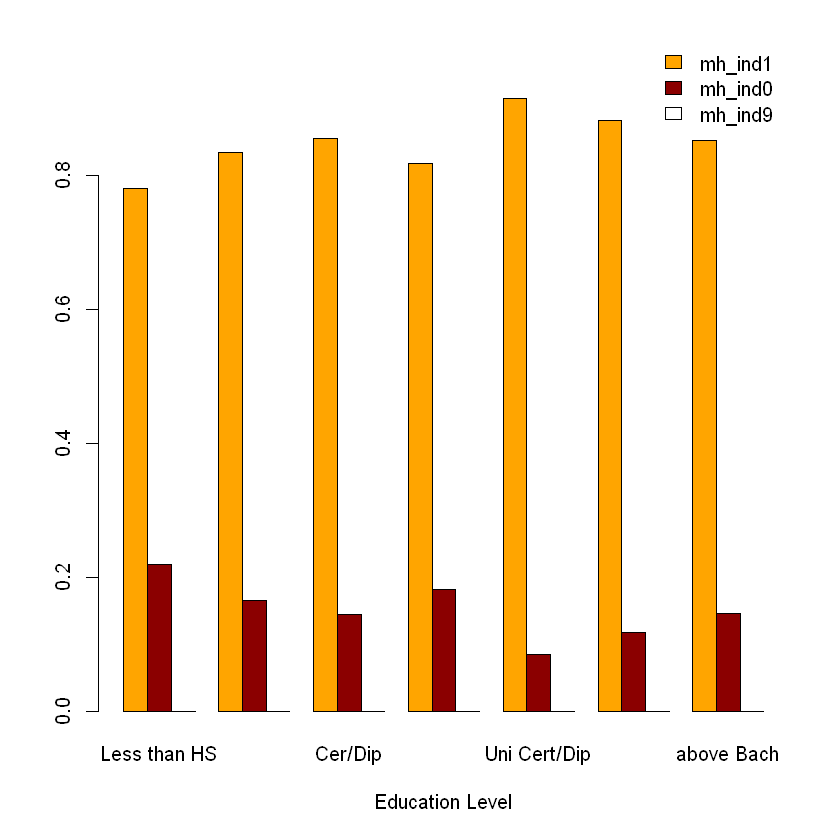

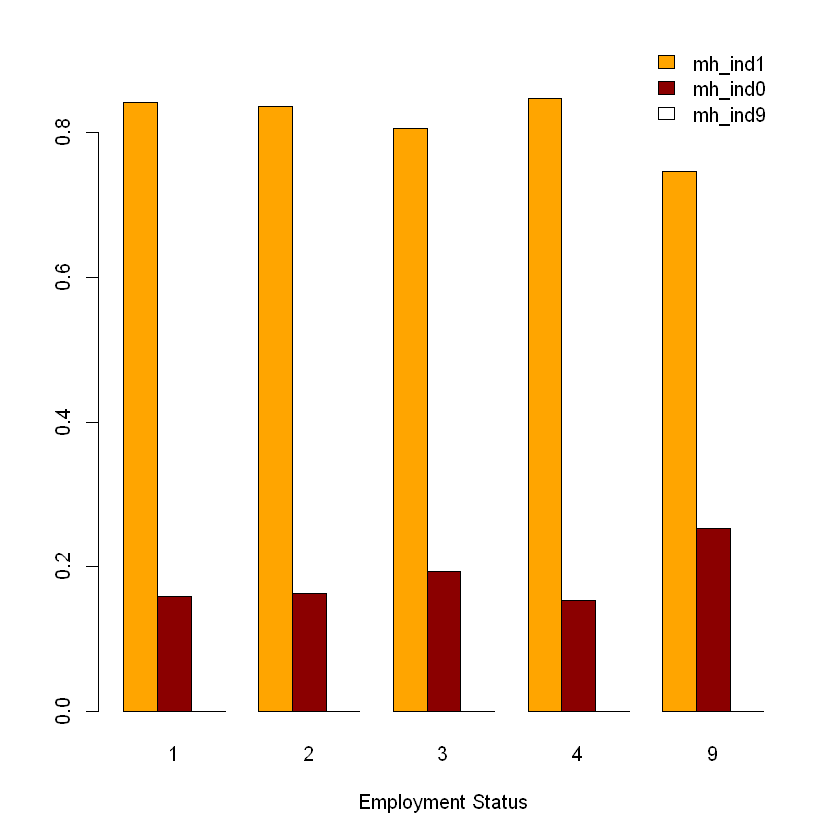

In [44]:
# Bivariate analysis:1. Age group and Mental Health
svytable(~agegrp+mh_ind,design =svy_data)
svychisq(~agegrp+mh_ind,design =svy_data,statistic="adjWald") #p-value <2.047e-11 dependent
#svyhist(~agegrp,design =svy_data)
barplt<-svyby(~mh_ind,~agegrp,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0, -.1)),
        xlab="Age Group", col=c("orange","darkred","white"),ylim=c(0,1),
        names.arg=c("15 to 24yrs", "25 to 34 yrs", "35 to 44 yrs",'45 to 54 yrs','55 to 64 yrs','65 to 74 yrs','75+'))

mh_age= (svyglm(factor(mh_ind)~factor(agegrp), family=quasibinomial, design=svy_data))

summary(mh_age)
res.aov <- svyranktest(factor(mh_ind)~factor(agegrp),design=svy_data,test=("KruskalWallis"))
res.aov
# Bivariate analysis:2. Sex and Mental Health
svytable(~sex+mh_ind,design =svy_data)
svychisq(~sex+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.01699
barplt<-svyby(~mh_ind,~sex,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0, -.1)),
        xlab="Sex", col=c("orange","darkred","white"),ylim=c(0,1),
        names.arg=c("Male", "Female"))
res.aov <- svyranktest(factor(mh_ind)~factor(sex),design=svy_data,test=("KruskalWallis"))


# Bivariate analysis:3. Rural aand Mental Health
svytable(~rururb+mh_ind,design =svy_data)
svychisq(~rururb+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.3914. Not dependent
barplt<-svyby(~mh_ind,~rururb,design =svy_data, na = TRUE, svymean)
barplot(barplt,legend.text = TRUE, beside=TRUE,
        args.legend = list(x = "topleft", bty = "n", inset=c(-0, -.1)),
        xlab="Rural and Urban", col=c("orange","darkred","white"),
        names.arg=c("Rural", "Urban"))

# Bivariate analysis:4. Immigration status and Mental Health 75% are canadians, 25% are immigrants
svymean(~factor(immigrnc),design =svy_data)
svytable(~immigrnc+mh_ind,design =svy_data)
svychisq(~immigrnc+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.001227 . dependent
barplt<-svyby(~mh_ind,~immigrnc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0, -.1)),
        xlab="Immigration status", col=c("orange","darkred","white"),
        names.arg=c("Canadian", "Immigrant"))
res.aov <- svyranktest(factor(mh_ind)~factor(immigrnc),design=svy_data,test=("KruskalWallis"))
res.aov
# Bivariate analysis:5. Householdsize and Mental Health
svytable(~hhldsizc+mh_ind,design =svy_data)
svychisq(~hhldsizc+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.06285 . Not dependent
barplt<-svyby(~mh_ind,~hhldsizc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topright", bty = "n", inset=c(-0, -.1)),
        xlab="Householdsize", col=c("orange","darkred","white"),
        names.arg=c("1", "2","3","4","5 +"))

# Bivariate analysis:6. Martial Status and Mental Health
svytable(~marstatc+mh_ind,design =svy_data)
svychisq(~marstatc+mh_ind,design =svy_data,statistic="adjWald") #p-value = 4.603e-08 . Dependent
barplt<-svyby(~mh_ind,~marstatc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topright", bty = "n", inset=c(-0.01, -.1)),
        xlab="Martial status", col=c("orange","darkred","white"),
        names.arg=c("Married", "Living common-law","Wid/Sep/Div","Single, never married"))

mh_ms <- (svyglm(factor(mh_ind)~factor(marstatc),family=quasibinomial, design=svy_data))
summary(mh_ms)
# Bivariate analysis:7. Education and Mental Health
svymean(~factor(peduc_lc),design =svy_data)
svytable(~peduc_lc+mh_ind,design =svy_data)
svychisq(~peduc_lc+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.05357 Not Dependent
barplt<-svyby(~mh_ind,~peduc_lc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topright", bty = "n", inset=c(-0.01, -.1)),
        xlab="Education Level", col=c("orange","darkred","white"),
        names.arg=c("Less than HS", "HS diploma","Cer/Dip","Some College","Uni Cert/Dip",
                    "Bach degree","above Bach"))

# Bivariate analysis:8. Mental health and employment
svymean(~factor(pempstc),design =svy_data)
svytable(~pempstc+mh_ind,design =svy_data)
svychisq(~pempstc+mh_ind,design =svy_data,statistic="adjWald") #p-value = 0.8782 Not Dependent
barplt<-svyby(~mh_ind,~pempstc,design =svy_data, na = TRUE, svymean)
confint(barplt)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topright", bty = "n", inset=c(-0, -.1)),
        xlab="Employment Status", col=c("orange","darkred","white")) 
        #names.arg=c("Less than HS", "HS diploma","Cer/Dip","Some College","Uni Cert/Dip",
                   # "Bach degree","above Bach"))

###  Mental health and its association with Socio Economic factors
**Age**: Dependent (KruskalWallis test  p-value = 2.047e-11)

### <span style="color:darkorange"> 15 to 24yrs, 65 to 74 yrs and 75+ year group(especially aged population) reported better mental health than other groups.  </span> 

**Sex**: Dependent (KruskalWallis test , p-value = 0.01699)  and (KruskalWallis test , p-value = 0.01622)
### <span style="color:darkorange"> Female mental health is more affected  </span>  

**Rural/Urban Status**: Not dependent (KruskalWallis test  p-value = 0.3914)

**Immigration Status**: Dependent (KruskalWallis test , p-value = 0.001227)

**Household size**: Not Dependent (KruskalWallis test , ddf = 4209, p-value = 0.06285)

**Martial Status**: Dependent. 
### <span style="color:darkorange"> Single/Never married are most affected while married people reported much better mental health  </span>  
**Education Level** : Not Dependent. Doesn’t have a significant association with people’s mental health

**Employment Status** : Not Dependent . Unemployment has not affected the mental health of the population in general.

### <span style="color:darkorange"> Employment, education level and Rural/urban status does not seem to have an association with mental health </span>  



In [30]:
#Logistic regression
mhlogit1 <- (svyglm(factor(mh_ind)~factor(agegrp)+
                    factor(sex)+
                    factor(rururb)+
                    factor(immigrnc)+
                    factor(marstatc)+
                    factor(hhldsizc)
                     ,family=quasibinomial, design=svy_data))
summary(mhlogit1)
mhlogit2 <- (svyglm(mh_ind~factor(agegrp)*factor(marstatc)*
                      factor(sex)+factor(immigrnc)
                      , family=quasibinomial, design=svy_data))
summary(mhlogit2)


psrsq(mhlogit1,method = c("Nagelkerke"))
psrsq(mhlogit2,method = c("Nagelkerke"))


Call:
svyglm(formula = factor(mh_ind) ~ factor(agegrp) + factor(sex) + 
    factor(rururb) + factor(immigrnc) + factor(marstatc) + factor(hhldsizc), 
    design = svy_data, family = quasibinomial)

Survey design:
subset(svy_data_all, mh_ind %in% c(1, 0))

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.69222    0.55747  -3.036 0.002416 ** 
factor(agegrp)2    0.24770    0.35374   0.700 0.483830    
factor(agegrp)3   -0.28141    0.37380  -0.753 0.451601    
factor(agegrp)4   -0.29509    0.37216  -0.793 0.427877    
factor(agegrp)5   -0.94240    0.38781  -2.430 0.015139 *  
factor(agegrp)6   -1.51989    0.42547  -3.572 0.000358 ***
factor(agegrp)7   -2.19454    0.66119  -3.319 0.000911 ***
factor(sex)2       0.41050    0.16458   2.494 0.012658 *  
factor(rururb)2    0.20728    0.23799   0.871 0.383837    
factor(immigrnc)2 -0.67246    0.23370  -2.877 0.004029 ** 
factor(marstatc)2 -0.40079    0.25486  -1.573 0.115891    
factor(marstatc)3  0.


Call:
svyglm(formula = mh_ind ~ factor(agegrp) * factor(marstatc) * 
    factor(sex) + factor(immigrnc), design = svy_data, family = quasibinomial)

Survey design:
subset(svy_data_all, mh_ind %in% c(1, 0))

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     -2.535505   1.154485  -2.196
factor(agegrp)2                                  0.818682   1.247016   0.657
factor(agegrp)3                                  0.820821   1.178175   0.697
factor(agegrp)4                                  0.915097   1.190116   0.769
factor(agegrp)5                                 -0.080696   1.203455  -0.067
factor(agegrp)6                                 -0.002354   1.211406  -0.002
factor(agegrp)7                                 -0.807591   1.489425  -0.542
factor(marstatc)2                              -12.849142   1.527362  -8.413
factor(marstatc)3                               19.319648   1.527362  12.649
factor(m

[1] 0.1215527

[1] 0.1487061

### <span style="color:darkgreen"> So, Mental health cannot be even fairly predicted with socio economic characteristics.</span>  

### <center><span style="color:darkorange"> Impact of education level in keeping Canadians employed during pandemic  </span>
</center>

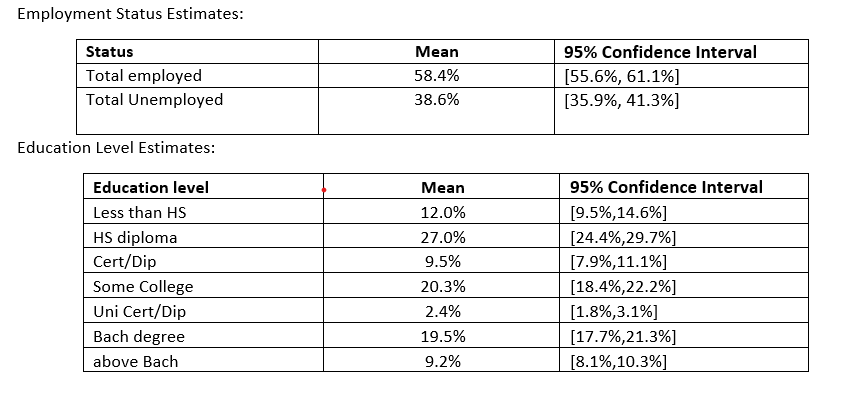



   1    2    3    4    9 
2068  270   86 1708   86 

emp_ind
         1          0          9 
18179372.5 12021127.1   946088.4 

,2.5 %,97.5 %
Employed,0.55622896,0.61111384
Unemployed,0.35897643,0.41293009
Not Available,0.01857766,0.04217303


,2.5 %,97.5 %
Less than HS,0.09485785,0.1457718
HS diploma,0.24350581,0.2966578
Cert/Dip,0.07912325,0.1108202
Some College,0.18384032,0.2222726
Uni Cert/Dip,0.01791114,0.0307417
Bach. deg,0.17722541,0.2131541
above Bach.,0.08069087,0.1034272


Independent Sampling design (with replacement)
subset(svy_data_all, emp_ind %in% c(1, 0))
Probabilities:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
4.970e-06 1.219e-04 2.610e-04 4.041e-04 5.153e-04 5.480e-03 
Data variables:
 [1] "pumfid"   "pers_wgt" "agegrp"   "sex"      "rururb"   "immigrnc"
 [7] "marstatc" "hhldsizc" "peduc_lc" "pempstc"  "emp_ind" 

        emp_ind
peduc_lc         1         0         9
       1 1455920.8 2205323.8       0.0
       2 4381768.0 3780155.9       0.0
       3 1825217.8  959625.3       0.0
       4 3982848.9 2101290.2       0.0
       5  421481.6  295005.5       0.0
       6 4213827.7 1755573.8       0.0
       7 1898307.6  924152.6       0.0


	Design-based Wald test of association

data:  svychisq(~peduc_lc + emp_ind, design = svy_data, statistic = "adjWald")
F = 6.1103, ndf = 6, ddf = 4126, p-value = 2.186e-06


,2.5 %,97.5 %
1:emp_ind1,0.2866699,0.5086448
2:emp_ind1,0.4775041,0.5962055
3:emp_ind1,0.5757567,0.7350660
4:emp_ind1,0.6101727,0.6990836
5:emp_ind1,0.4687391,0.7077835
6:emp_ind1,0.6628897,0.7489194
7:emp_ind1,0.6186334,0.7265105
1:emp_ind0,0.4913552,0.7133301
2:emp_ind0,0.4037945,0.5224959
3:emp_ind0,0.2649340,0.4242433



Call:
svyglm(formula = emp_ind ~ factor(peduc_lc), design = svy_data, 
    family = quasibinomial)

Survey design:
subset(svy_data_all, emp_ind %in% c(1, 0))

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.4152     0.2364   1.756 0.079096 .  
factor(peduc_lc)2  -0.5629     0.2659  -2.117 0.034342 *  
factor(peduc_lc)3  -1.0581     0.2971  -3.561 0.000373 ***
factor(peduc_lc)4  -1.0547     0.2568  -4.107 4.09e-05 ***
factor(peduc_lc)5  -0.7720     0.3454  -2.235 0.025449 *  
factor(peduc_lc)6  -1.2908     0.2590  -4.984 6.47e-07 ***
factor(peduc_lc)7  -1.1351     0.2674  -4.245 2.24e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 1.000242)

Number of Fisher Scoring iterations: 4


[1] 0.0530414

ERROR: Error in summ(EMP_EDU): could not find function "summ"


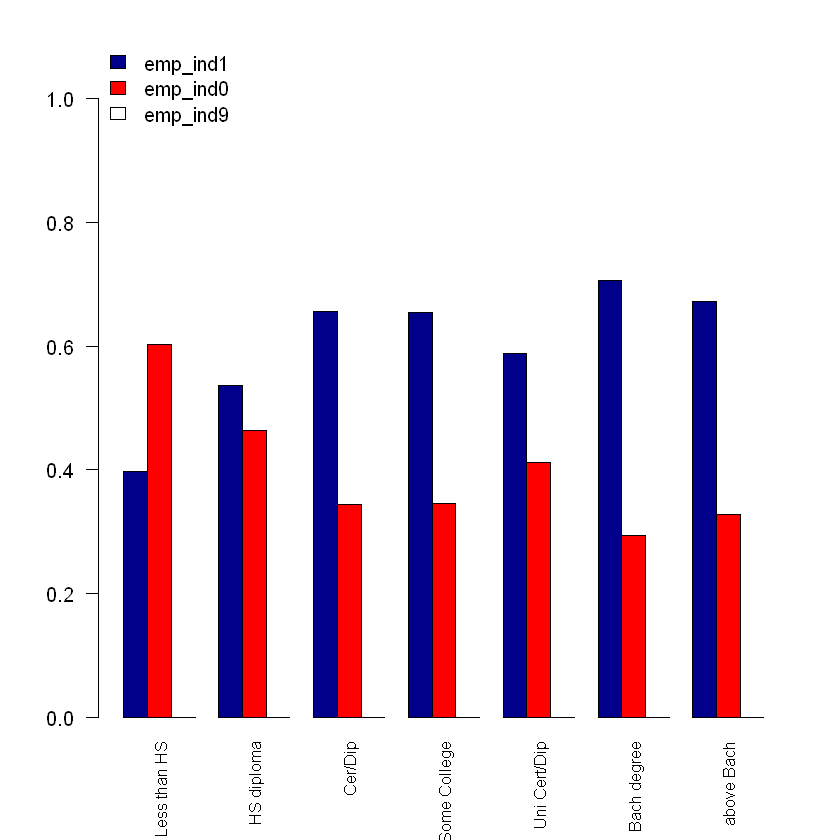

In [31]:
#Employment status based on SEC. Data Wrangling

analysis_employment=raw %>%
  select(pumfid,
         pers_wgt,
         agegrp,
         sex,
         rururb,
         immigrnc,
         marstatc,
         hhldsizc,
         peduc_lc,
         pempstc)

#summary(analysis_employment)
#Filter records that has a valid employment status. Take sub population-Ignore  records with 'Not stated' code 9
analysis_employment_data=analysis_employment 
table(analysis_employment_data$pempstc)
#Create Employment indicator
analysis_employment_data$emp_ind=cut(analysis_employment_data$pempstc,c(0,3,4,Inf), c(1,0,9))

svy_data_all = svydesign(id=~pumfid, weights=~pers_wgt, survey.lonely.psu = "adjust", data=analysis_employment_data)
svytable(~emp_ind,design =svy_data_all)
total_emp=svymean(~emp_ind,design =svy_data_all)
names(total_emp)=c("Employed", "Unemployed", "Not Available")

confint(total_emp)

total_edu=svymean(~factor(peduc_lc),design =svy_data_all)
names(total_edu)=c("Less than HS", "HS diploma","Cert/Dip","Some College","Uni Cert/Dip",
                   "Bach. deg","above Bach.")

confint(total_edu)
 
svy_data = subset(svy_data_all ,emp_ind%in%c(1,0))
summary(svy_data)

#Education and employment 
svytable(~peduc_lc+emp_ind,design =svy_data)
svychisq(~peduc_lc+emp_ind,design =svy_data,statistic="adjWald") #p-value = 2.186e-06 Dependent
barplt<-svyby(~emp_ind,~peduc_lc,design =svy_data, na = TRUE, svymean)
confint(barplt)
par(las=2) # make label text perpendicular to axis
barplot(barplt,beside=TRUE,legend.text = TRUE,cex.names=0.8,
        args.legend = list(x = "topleft", bty = "n", inset=c(-0.01, -.1)),
        col=c("darkblue","red","white"),ylim=c(0,1),
        names.arg=c("Less than HS", "HS diploma","Cer/Dip","Some College","Uni Cert/Dip",
                    "Bach degree","above Bach"))
EMP_EDU <- (svyglm(emp_ind~factor(peduc_lc), family=quasibinomial,design=svy_data))
summary(EMP_EDU)
psrsq(EMP_EDU,method = c("Nagelkerke"))
summ(EMP_EDU)

      emp_ind
agegrp         1         0         9
     1 2364836.1 1783769.6       0.0
     2 4277309.1  754076.7       0.0
     3 4127813.4  783263.3       0.0
     4 3637446.7 1040940.5       0.0
     5 2894978.5 2182079.2       0.0
     6  761108.1 3767174.1       0.0
     7  115880.6 1709823.7       0.0


	Design-based Wald test of association

data:  svychisq(~agegrp + emp_ind, design = svy_data, statistic = "adjWald")
F = 80.696, ndf = 6, ddf = 4126, p-value < 2.2e-16


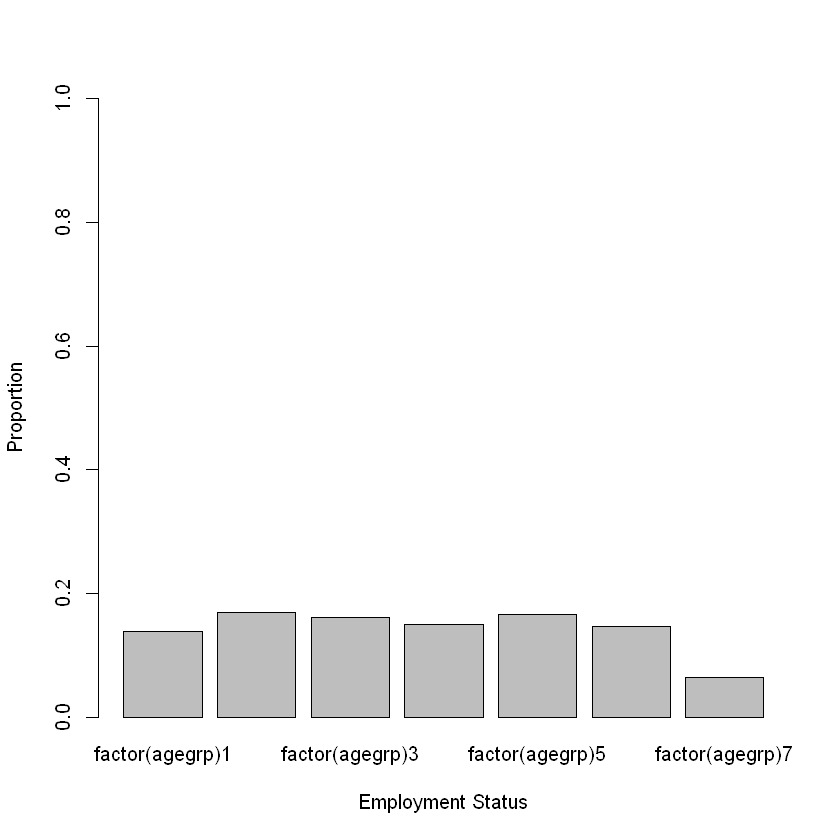

   emp_ind
sex       1       0       9
  1 9641373 5145316       0
  2 8537999 6875811       0


	Design-based Wald test of association

data:  svychisq(~sex + emp_ind, design = svy_data, statistic = "adjWald")
F = 12.314, ndf = 1, ddf = 4131, p-value = 0.0004543


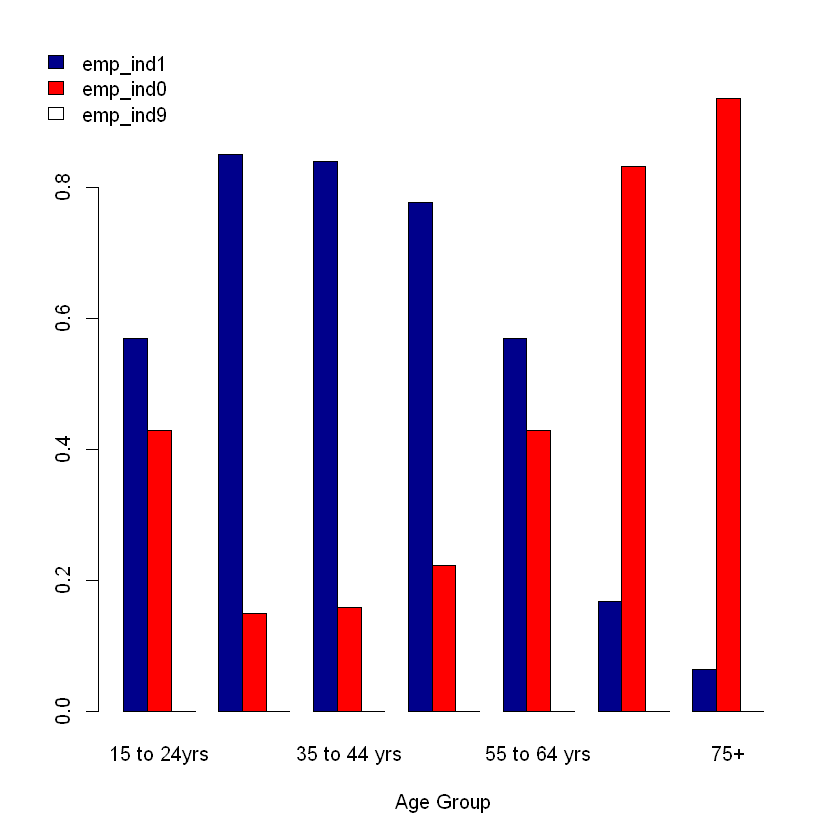

      emp_ind
rururb        1        0        9
     1  2665905  1933855        0
     2 15513467 10087272        0


	Design-based Wald test of association

data:  svychisq(~rururb + emp_ind, design = svy_data, statistic = "adjWald")
F = 0.61945, ndf = 1, ddf = 4131, p-value = 0.4313


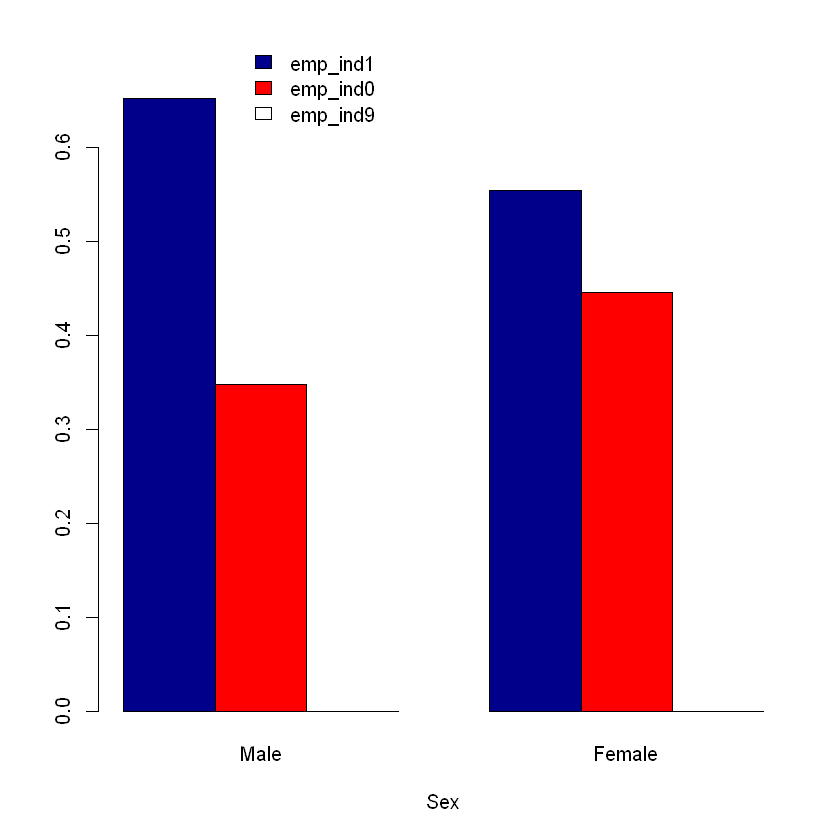

        emp_ind
immigrnc        1        0        9
       1 13867479  9078392        0
       2  4311893  2942735        0


	Design-based Wald test of association

data:  svychisq(~immigrnc + emp_ind, design = svy_data, statistic = "adjWald")
F = 0.08123, ndf = 1, ddf = 4131, p-value = 0.7757


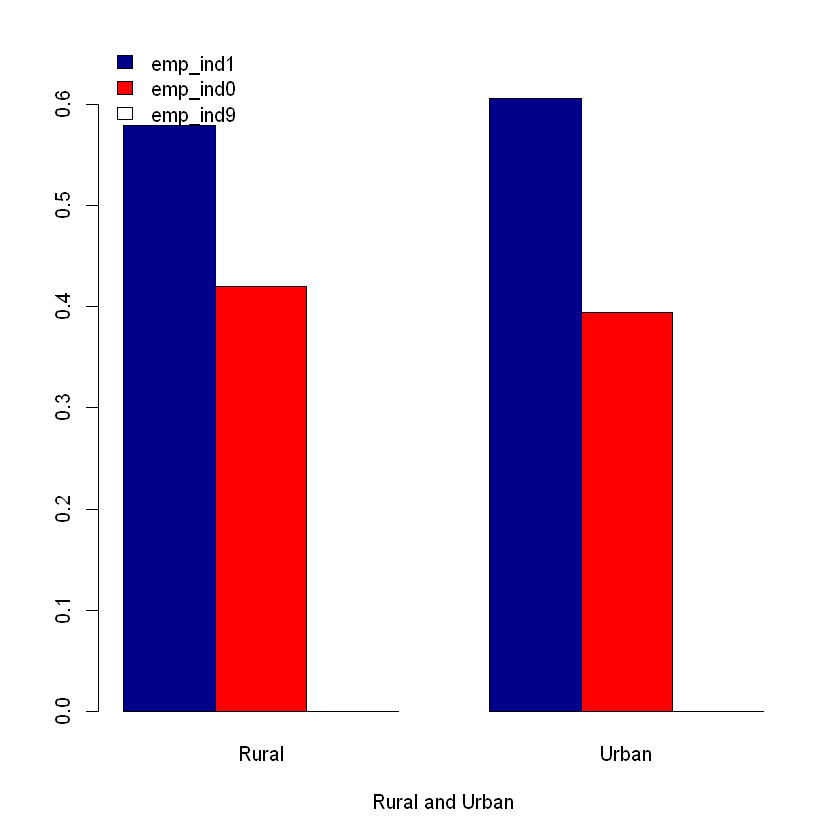

        emp_ind
hhldsizc         1         0         9
       1 2832151.0 1956639.3       0.0
       2 9246597.6 6759964.2       0.0
       3 3343893.7 1755499.5       0.0
       4 1768687.8 1256861.7       0.0
       5  988042.3  292162.4       0.0


	Design-based Wald test of association

data:  svychisq(~hhldsizc + emp_ind, design = svy_data, statistic = "adjWald")
F = 1.6076, ndf = 4, ddf = 4128, p-value = 0.1694


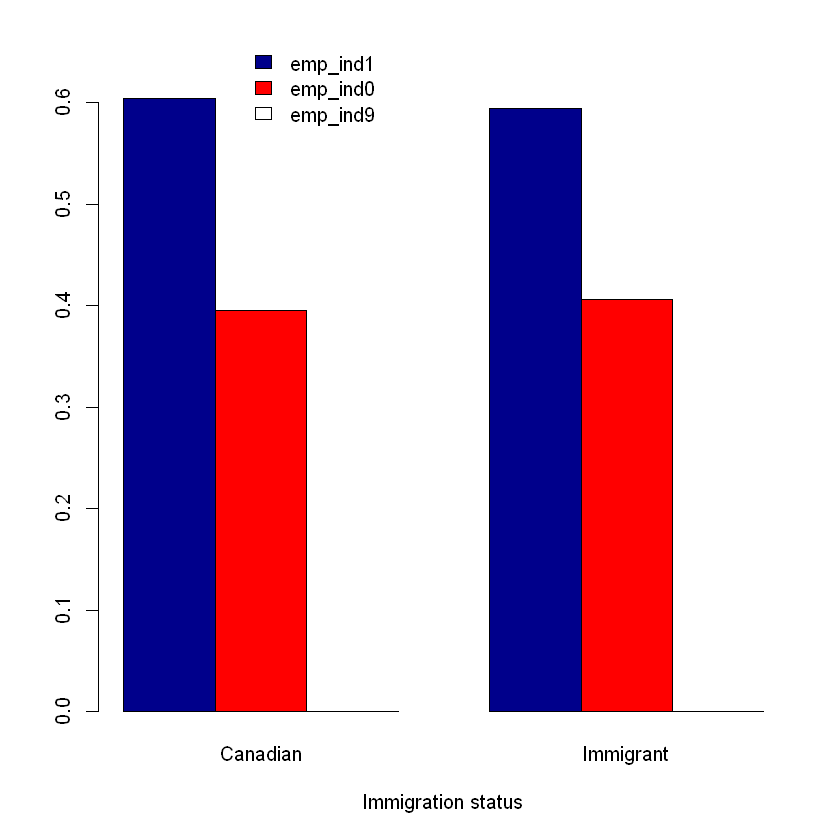

        emp_ind
marstatc         1         0         9
       1 8911160.2 6286505.7       0.0
       2 2406674.9  978677.8       0.0
       3 1376508.9 1894457.8       0.0
       4 5485028.4 2861485.8       0.0


	Design-based Wald test of association

data:  svychisq(~marstatc + emp_ind, design = svy_data, statistic = "adjWald")
F = 12.387, ndf = 3, ddf = 4129, p-value = 4.603e-08


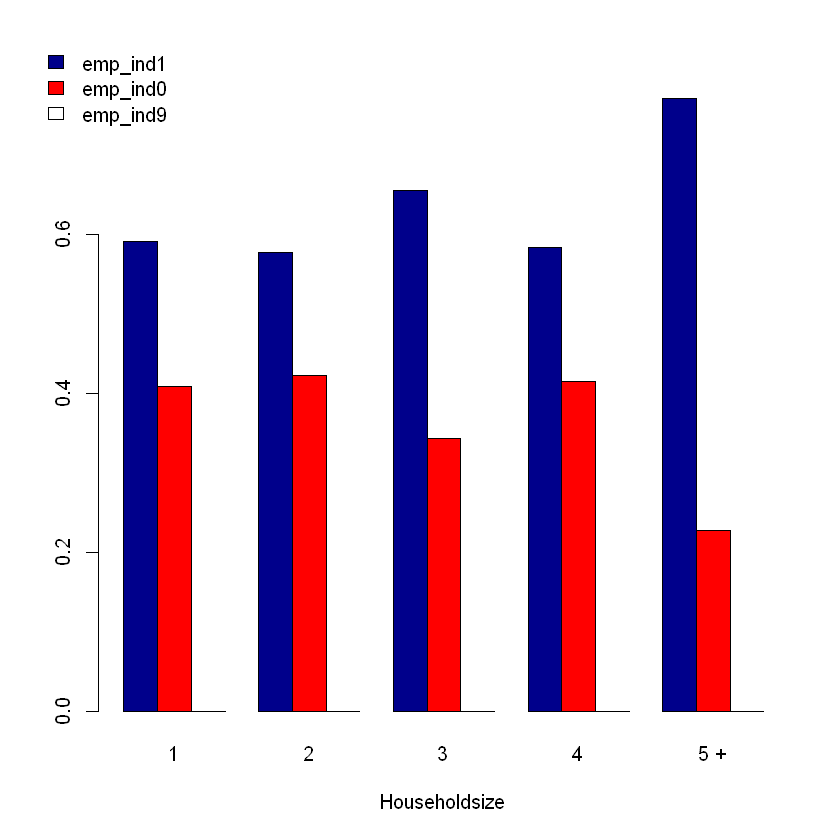

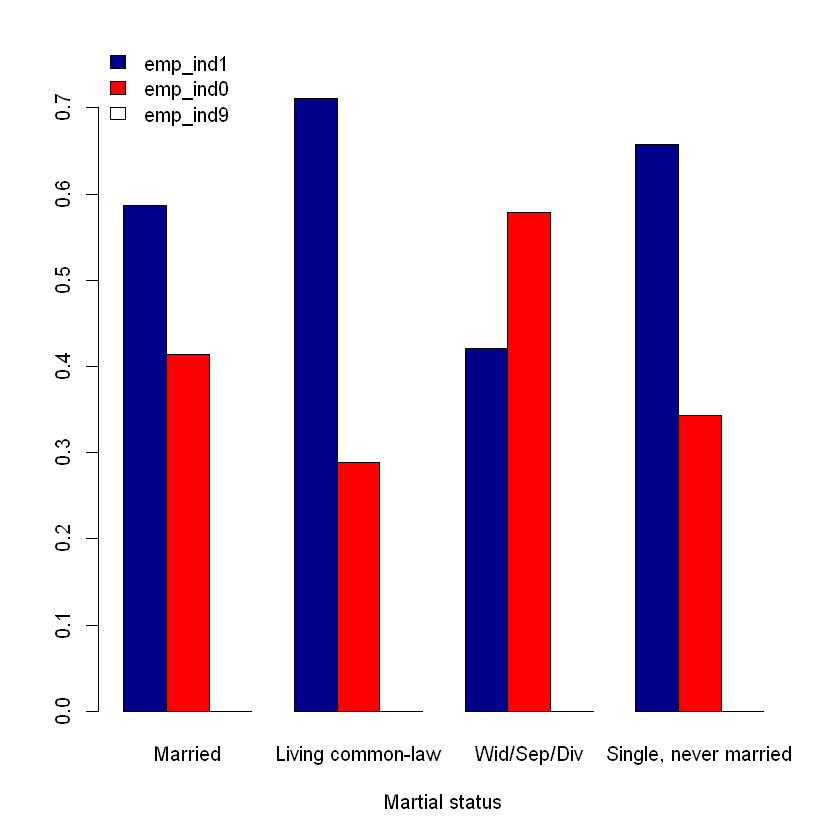

In [37]:
# Bivariate analysis. 

age=svymean(~factor(agegrp),design =svy_data_all)
barplot(age,beside=TRUE,legend.text = F, 
        #args.legend = list(x = "topright", bty = "n", inset=c(-0.1, -.1)),
        xlab="Employment Status", 
        ylab="Proportion",ylim=c(0,1))

# Bivariate analysis:1. Age group and employment
svytable(~agegrp+emp_ind,design =svy_data)
svychisq(~agegrp+emp_ind,design =svy_data,statistic="adjWald") #p-value < 2.2e-16 dependent
#svyhist(~agegrp,design =svy_data)
barplt<-svyby(~emp_ind,~agegrp,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0.1, -.1)),
        xlab="Age Group", col=c("darkblue","red","white"),
        names.arg=c("15 to 24yrs", "25 to 34 yrs", "35 to 44 yrs",'45 to 54 yrs','55 to 64 yrs','65 to 74 yrs','75+'))
 


# Bivariate analysis:2. Sex and employment
svytable(~sex+emp_ind,design =svy_data)
svychisq(~sex+emp_ind,design =svy_data,statistic="adjWald") #p-value = 0.0005213
barplt<-svyby(~emp_ind,~sex,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(+0.2, -.1)),
        xlab="Sex", col=c("darkblue","red","white"),
        names.arg=c("Male", "Female"))


# Bivariate analysis:3. Rural and Urban 
svytable(~rururb+emp_ind,design =svy_data)
svychisq(~rururb+emp_ind,design =svy_data,statistic="adjWald") #p-value = 0.4335 . Not dependent
barplt<-svyby(~emp_ind,~rururb,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(0, -.1)),
        xlab="Rural and Urban", col=c("darkblue","red","white"),
        names.arg=c("Rural", "Urban"))

# Bivariate analysis:4. Immigration status and employment 
svytable(~immigrnc+emp_ind,design =svy_data)
svychisq(~immigrnc+emp_ind,design =svy_data,statistic="adjWald") #p-value =  0.7757 . Not dependent
barplt<-svyby(~emp_ind,~immigrnc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(+0.2, -.1)),
        xlab="Immigration status", col=c("darkblue","red","white"),
        names.arg=c("Canadian", "Immigrant"))

# Bivariate analysis:5. Householdsize and employment 
svytable(~hhldsizc+emp_ind,design =svy_data)
svychisq(~hhldsizc+emp_ind,design =svy_data,statistic="adjWald") #p-value =  0.1694 . Not dependent
barplt<-svyby(~emp_ind,~hhldsizc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0.1, -.1)),
        xlab="Householdsize", col=c("darkblue","red","white"),
        names.arg=c("1", "2","3","4","5 +"))

# Bivariate analysis:6. Martial Status and employment 
svytable(~marstatc+emp_ind,design =svy_data)
svychisq(~marstatc+emp_ind,design =svy_data,statistic="adjWald") #p-value = 4.603e-08 . Dependent
barplt<-svyby(~emp_ind,~marstatc,design =svy_data, na = TRUE, svymean)
barplot(barplt,beside=TRUE,legend.text = TRUE, 
        args.legend = list(x = "topleft", bty = "n", inset=c(-0.01, -.1)),
        xlab="Martial status", col=c("darkblue","red","white"),
        names.arg=c("Married", "Living common-law","Wid/Sep/Div","Single, never married"))



In [33]:
#Logistic regression Employment vs. Unemployment
logit1 <- (svyglm(factor(emp_ind)~factor(agegrp)+
                    factor(sex)+
                    #factor(rururb)+
                    factor(immigrnc)+
                    factor(marstatc)+
                    #factor(hhldsizc)+
                    factor(peduc_lc), family=quasibinomial, design=svy_data))
summary(logit1)
psrsq(logit1,method = c("Nagelkerke")) 
summ(logit1)

logit2 <- (svyglm(factor(emp_ind)~factor(agegrp)*factor(peduc_lc)+
                    factor(sex)+
                    factor(marstatc)*factor(hhldsizc)+
                    factor(immigrnc)
                    #factor(rururb)*
                    
                    #factor(hhldsizc)+
                    , family=quasibinomial, design=svy_data))
summary(logit2)
psrsq(logit2,method = c("Nagelkerke")) 
summ(logit2)


Call:
svyglm(formula = factor(emp_ind) ~ factor(agegrp) + factor(sex) + 
    factor(immigrnc) + factor(marstatc) + factor(peduc_lc), design = svy_data, 
    family = quasibinomial)

Survey design:
subset(svy_data_all, emp_ind %in% c(1, 0))

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.48799    0.40832  -1.195 0.232108    
factor(agegrp)2   -0.95493    0.33131  -2.882 0.003969 ** 
factor(agegrp)3   -0.85771    0.32909  -2.606 0.009187 ** 
factor(agegrp)4   -0.47163    0.33304  -1.416 0.156803    
factor(agegrp)5    0.51508    0.31600   1.630 0.103178    
factor(agegrp)6    2.34723    0.33984   6.907 5.71e-12 ***
factor(agegrp)7    3.45599    0.47187   7.324 2.88e-13 ***
factor(sex)2       0.53372    0.14795   3.608 0.000313 ***
factor(immigrnc)2  0.15604    0.18406   0.848 0.396605    
factor(marstatc)2  0.04227    0.18948   0.223 0.823479    
factor(marstatc)3  0.07427    0.24339   0.305 0.760256    
factor(marstatc)4  0.16612    0.1806

[1] 0.3885813

ERROR: Error in summ(logit1): could not find function "summ"


 
### <span style="color:darkgreen"> Though not much, there exist a Statistically Significant relationship between education and employment.  </span>
### <span style="color:darkgreen"> The odds for being employed for people with Bach or above is more compared with other. </span> 

### <span style="color:darkorange"> But, the employment status can be better explained with SEC factors- age group, sex, immigration status, martial status(Pseudo-R²  = 0. 3885) </span>

### <span style="color:darkorange"> Including the interaction between 1.  agegroup and education level 2. Marital status and household status(Pseudo-R² = 0.426 </span>


 

## <center> Conclusion  </center>
# 



### <span style="color:darkgreen">  There is a significant variation in the proportion of canadians who take precautions with respect to their main source of information </span>
#### <span style="color:darkorange">    Government, health service sources and Place of employment are effective ways to implement precautions. </span>

### <span style="color:darkgreen">  Mental health during the pandameic cannot be associated with the socio economic factors </span>
    
### <span style="color:darkgreen">  While education is a factor in keeping Canadians employed during pandemic, Socio economic factors play an important role in employment status.</span>

### <span style="color:darkgreen">Females are more affected by unemployment and poor mental health </span>

# 
# 

## <center> Thank you! </center>
